In [37]:
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [2]:
path = "../processed/evaluated/evaluated_448_05_03_2024.csv"
df = pd.read_csv(path)

In [3]:
z_threshold = 4.0
# Need to binary classify the results 

In [4]:
def gen_base_df(full_df):
    base_wmark_df = full_df[["kgw-watermarked", "kgw-wm-zscore"]].copy()
    base_wmark_df["watermarked"] = [True for _ in range(len(base_wmark_df))]
    base_wmark_df = base_wmark_df.rename(columns={"kgw-watermarked": "text", "kgw-wm-zscore": "z-score"})

    non_wmark_df = full_df[["non-watermarked", "non-wm-zscore"]].copy()
    non_wmark_df["watermarked"] = [False for _ in range(len(non_wmark_df))]
    non_wmark_df = non_wmark_df.rename(columns={"non-watermarked": "text", "non-wm-zscore": "z-score"})
    
    bc_df = pd.concat([base_wmark_df, non_wmark_df])
    bc_df['watermark-detected'] = bc_df.apply(lambda x: x['z-score'] > z_threshold, axis=1)
    return bc_df

In [13]:
df.columns

Index(['id', 'instructions', 'text', 'kgw-watermarked', 'non-watermarked',
       'pp-kgw-para-1', 'pp-unwatermarked-para-1', 'pp-kgw-para-2',
       'pp-unwatermarked-para-2', 'pp-kgw-para-3', 'pp-unwatermarked-para-3',
       'pp-kgw-sent-1', 'pp-unwatermarked-sent-1', 'pp-kgw-sent-2',
       'pp-unwatermarked-sent-2', 'pp-kgw-sent-3', 'pp-unwatermarked-sent-3',
       'pp-kgw-word-1', 'pp-unwatermarked-word-1', 'pp-kgw-word-2',
       'pp-unwatermarked-word-2', 'pp-kgw-word-3', 'pp-unwatermarked-word-3',
       'pp-para-sim-1', 'pp-para-sim-2', 'pp-para-sim-3', 'pp-sent-sim-1',
       'pp-sent-sim-2', 'pp-sent-sim-3', 'pp-word-sim-1', 'pp-word-sim-2',
       'pp-word-sim-3', 'kgw-wm-zscore', 'non-wm-zscore', 'kgw-para-zscore-2',
       'kgw-para-zscore-3', 'kgw-para-zscore-1', 'nowm-para-zscore-2',
       'nowm-para-zscore-3', 'nowm-para-zscore-1', 'kgw-sent-zscore-2',
       'kgw-sent-zscore-3', 'kgw-sent-zscore-1', 'nowm-sent-zscore-2',
       'nowm-sent-zscore-3', 'nowm-sent-zsco

In [32]:
def gen_paraphrase_df(full_df, pp_type="para", pp_iter = 1, z_threshold = 2.0):
    wm_col_text = f"pp-kgw-{pp_type}-{pp_iter}"
    wm_col_score = f"kgw-{pp_type}-zscore-{pp_iter}"
    wmark_df = full_df[[wm_col_text, wm_col_score]]
    wmark_df = wmark_df.rename(columns={wm_col_text: "text", wm_col_score: "z-score"})
    wmark_df["watermarked"] = [True for _ in range(len(wmark_df))]
    
    nwmark_col_text = f"pp-unwatermarked-{pp_type}-{pp_iter}"
    nwmark_col_score = f"nowm-{pp_type}-zscore-{pp_iter}"
    nwmark_df = full_df[[nwmark_col_text, nwmark_col_score]]
    nwmark_df = nwmark_df.rename(columns={nwmark_col_text: "text", nwmark_col_score: "z-score"})
    nwmark_df["watermarked"] = [False for _ in range(len(nwmark_df))]
    
    bc_df = pd.concat([wmark_df, nwmark_df])
    bc_df["watermark-detected"] = bc_df.apply(lambda x: x['z-score'] > z_threshold, axis=1)
    return bc_df

In [49]:
image_output_path = "../results/roc/"

In [61]:
test_df = gen_paraphrase_df(df, pp_type="word", pp_iter=1)
test_df

,text,z-score,watermarked,watermark-detected
0,title: prize other people's place: cognizance ...,3.201285,True,True
1,title: step out of comfort zone: The value of ...,2.199888,True,True
2,title: The value of patience and preciseness i...,2.867518,True,True
3,Title: adopt genuineness in an counterfeit ear...,3.177435,True,True
4,title: cultivate graphic symbol: A option or a...,5.797643,True,True
...,...,...,...,...
443,title: extend School hour: weigh the Benefits ...,3.197374,False,True
444,title: The Four-Day week: A New path to Econom...,-0.199681,False,False
445,Title: Pursuing excellence: A journeying to en...,-1.553854,False,False
446,title: Intergenerational bridge: A New course ...,-0.647298,False,False


C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

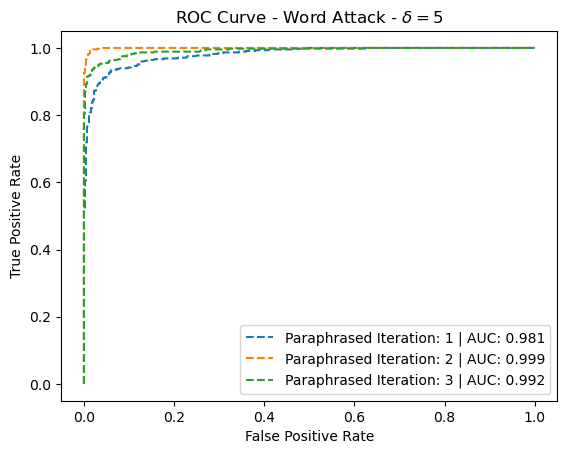

In [59]:
pp_type = "word"
for i in range(1,4):
    pp_bc_df = gen_paraphrase_df(df, pp_type=pp_type, pp_iter=i)
    y_values, y_pred = pp_bc_df["watermarked"], pp_bc_df["z-score"]
    fpr, tpr, thresholds = roc_curve(y_values, y_pred)
    roc_auc = auc(fpr, tpr)
    # display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    # display.plot()
    plt.plot(fpr, tpr, linestyle='--', label=f'Paraphrased Iteration: {i} | AUC: {roc_auc:.3f}')

plt.title(f"ROC Curve - {pp_type.capitalize()} Attack - $\delta = 5$")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.savefig(image_output_path+f"roc-curve-{pp_type}.pdf", format="pdf", bbox_inches='tight')
plt.show()